### Real Estate rent price prediction
Our topic is real estate price prediction in Dubai
What our model will do is predict the real estate prices based on the data used for training. 

We scraped the data from Propert Finder.
Each row in our data resembles an ad on the website.
After collecting the data, we started cleaning and preprocessing the data.

In [82]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
import scipy as sp

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso, Ridge

from sklearn.preprocessing import StandardScaler

In [84]:
df = pd.read_csv("apartment_data.csv")

In [85]:
df

,listing_type,bedrooms,bathrooms,area,price,location,description
0,Townhouse,4,4,"2,165 sqft","135,000 AED/year",Maple 2- Maple at Dubai Hills Estate- Dubai Hi...,Brought to you by Driven Properties- this 4 Be...
1,Apartment,2,3,"1,602 sqft",Ask for price,Golden Sands 14- Mankhool- Bur Dubai- Dubai,Unprecedented Luxury | Unique Blend of Hospita...
2,Apartment,1,2,927 sqft,"145,000 AED/year",The Address Downtown Hotel- Downtown Dubai- Dubai,Brought to you by Driven Properties- this 1 Be...
3,Apartment,2,2,"1,085 sqft","110,000 AED/year",The Fairways North- The Fairways- The Views- D...,We are very proud to present to you with this ...
4,Apartment,1,2,857 sqft,"53,999 AED/year",Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...
...,...,...,...,...,...,...,...
16253,Apartment,1,None,837 sqft,"48,000 AED/year",La Residence- Jumeirah Village Triangle- Dubai,Exclusive Links Real Estate presenting an amaz...
16254,Apartment,3,4,"2,012 sqft","150,000 AED/year",The Flagship Two- Al Satwa- Dubai,The Flagship Two - Jumeirah Garden City Satwa\...
16255,Apartment,2,3,"1,390 sqft","125,000 AED/year",Burj Al Salam- Sheikh Zayed Road- Dubai,Excel Properties brings you this fully furnish...
16256,Townhouse,3,1,"1,881 sqft","69,999 AED/year",Casablanca Boutique Villas- Coursetia- Akoya- ...,Amazing Brand New 3 Bedroom with Maids Room\t...


In [86]:
df.columns

Index(['listing_type', 'bedrooms', 'bathrooms', 'area', 'price', 'location',
       'description'],
      dtype='object')

# Removing duplicate data

In [87]:
df.duplicated().sum()

3258

We notice 3k rows of duplicate data

In [88]:
df = df.drop_duplicates()
df

,listing_type,bedrooms,bathrooms,area,price,location,description
0,Townhouse,4,4,"2,165 sqft","135,000 AED/year",Maple 2- Maple at Dubai Hills Estate- Dubai Hi...,Brought to you by Driven Properties- this 4 Be...
1,Apartment,2,3,"1,602 sqft",Ask for price,Golden Sands 14- Mankhool- Bur Dubai- Dubai,Unprecedented Luxury | Unique Blend of Hospita...
2,Apartment,1,2,927 sqft,"145,000 AED/year",The Address Downtown Hotel- Downtown Dubai- Dubai,Brought to you by Driven Properties- this 1 Be...
3,Apartment,2,2,"1,085 sqft","110,000 AED/year",The Fairways North- The Fairways- The Views- D...,We are very proud to present to you with this ...
4,Apartment,1,2,857 sqft,"53,999 AED/year",Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...
...,...,...,...,...,...,...,...
16253,Apartment,1,None,837 sqft,"48,000 AED/year",La Residence- Jumeirah Village Triangle- Dubai,Exclusive Links Real Estate presenting an amaz...
16254,Apartment,3,4,"2,012 sqft","150,000 AED/year",The Flagship Two- Al Satwa- Dubai,The Flagship Two - Jumeirah Garden City Satwa\...
16255,Apartment,2,3,"1,390 sqft","125,000 AED/year",Burj Al Salam- Sheikh Zayed Road- Dubai,Excel Properties brings you this fully furnish...
16256,Townhouse,3,1,"1,881 sqft","69,999 AED/year",Casablanca Boutique Villas- Coursetia- Akoya- ...,Amazing Brand New 3 Bedroom with Maids Room\t...


So now we are left with 12k rows

### Removing trailing spaces around the text

In [89]:
df.loc[:,'listing_type'] = df.loc[:,'listing_type'].map(lambda x: x.strip())
df.loc[:,'bedrooms'] = df.loc[:,'bedrooms'].map(lambda x: x.strip())
df.loc[:,'bathrooms'] = df.loc[:,'bathrooms'].map(lambda x: x.strip())
df.loc[:,'area'] = df.loc[:,'area'].map(lambda x: x.strip())
df.loc[:,'price'] = df.loc[:,'price'].map(lambda x: x.strip())
df.loc[:,'location'] = df.loc[:,'location'].map(lambda x: x.strip())
df.loc[:,'description'] = df.loc[:,'description'].map(lambda x: x.strip())

/Users/zeinathabet/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


# Checking None or missing values

Our data has 'None' for missing values, which seem to not be caught by pandas

In [90]:
df.isnull().sum()

listing_type    0
bedrooms        0
bathrooms       0
area            0
price           0
location        0
description     0
dtype: int64

#### Manually checking for 'None' Values

In [91]:
for label, content in df.items():
    print(f"label: {label} has {content.str.contains('None').sum()} None values ")

label: listing_type has 0 None values 
label: bedrooms has 8 None values 
label: bathrooms has 212 None values 
label: area has 6 None values 
label: price has 0 None values 
label: location has 0 None values 
label: description has 0 None values 


### Switching None values to NaN 

In [92]:
df.loc[:,'bedrooms'] = df['bedrooms'].replace("None", np.nan , regex=True)
df.loc[:,'bathrooms'] = df['bathrooms'].replace("None", np.nan , regex=True)
df.loc[:,'area'] = df['area'].replace("None", np.nan , regex=True)
df.loc[:,'price'] = df['price'].replace("None", np.nan , regex=True)

In [93]:
df.isnull().sum()

listing_type      0
bedrooms          8
bathrooms       212
area              6
price             0
location          0
description       0
dtype: int64

#### We can observe "bathrooms" having the highest number of missing values

### Drop missing values
missing values only account to 1.5% of our original data, so we decided to drop them

In [94]:
df = df.dropna()
df

,listing_type,bedrooms,bathrooms,area,price,location,description
0,Townhouse,4,4,"2,165 sqft","135,000 AED/year",Maple 2- Maple at Dubai Hills Estate- Dubai Hi...,Brought to you by Driven Properties- this 4 Be...
1,Apartment,2,3,"1,602 sqft",Ask for price,Golden Sands 14- Mankhool- Bur Dubai- Dubai,Unprecedented Luxury | Unique Blend of Hospita...
2,Apartment,1,2,927 sqft,"145,000 AED/year",The Address Downtown Hotel- Downtown Dubai- Dubai,Brought to you by Driven Properties- this 1 Be...
3,Apartment,2,2,"1,085 sqft","110,000 AED/year",The Fairways North- The Fairways- The Views- D...,We are very proud to present to you with this ...
4,Apartment,1,2,857 sqft,"53,999 AED/year",Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...
...,...,...,...,...,...,...,...
16252,Villa,3,4,"3,063 sqft","209,999 AED/year",Legacy- Jumeirah Park- Dubai,- Legacy Style Villa\t- All White Goods includ...
16254,Apartment,3,4,"2,012 sqft","150,000 AED/year",The Flagship Two- Al Satwa- Dubai,The Flagship Two - Jumeirah Garden City Satwa\...
16255,Apartment,2,3,"1,390 sqft","125,000 AED/year",Burj Al Salam- Sheikh Zayed Road- Dubai,Excel Properties brings you this fully furnish...
16256,Townhouse,3,1,"1,881 sqft","69,999 AED/year",Casablanca Boutique Villas- Coursetia- Akoya- ...,Amazing Brand New 3 Bedroom with Maids Room\t...


# Cleaning and preprocessing data

## Price Column

In [95]:
df

,listing_type,bedrooms,bathrooms,area,price,location,description
0,Townhouse,4,4,"2,165 sqft","135,000 AED/year",Maple 2- Maple at Dubai Hills Estate- Dubai Hi...,Brought to you by Driven Properties- this 4 Be...
1,Apartment,2,3,"1,602 sqft",Ask for price,Golden Sands 14- Mankhool- Bur Dubai- Dubai,Unprecedented Luxury | Unique Blend of Hospita...
2,Apartment,1,2,927 sqft,"145,000 AED/year",The Address Downtown Hotel- Downtown Dubai- Dubai,Brought to you by Driven Properties- this 1 Be...
3,Apartment,2,2,"1,085 sqft","110,000 AED/year",The Fairways North- The Fairways- The Views- D...,We are very proud to present to you with this ...
4,Apartment,1,2,857 sqft,"53,999 AED/year",Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...
...,...,...,...,...,...,...,...
16252,Villa,3,4,"3,063 sqft","209,999 AED/year",Legacy- Jumeirah Park- Dubai,- Legacy Style Villa\t- All White Goods includ...
16254,Apartment,3,4,"2,012 sqft","150,000 AED/year",The Flagship Two- Al Satwa- Dubai,The Flagship Two - Jumeirah Garden City Satwa\...
16255,Apartment,2,3,"1,390 sqft","125,000 AED/year",Burj Al Salam- Sheikh Zayed Road- Dubai,Excel Properties brings you this fully furnish...
16256,Townhouse,3,1,"1,881 sqft","69,999 AED/year",Casablanca Boutique Villas- Coursetia- Akoya- ...,Amazing Brand New 3 Bedroom with Maids Room\t...


We need to remove AED/year and rows that have 'ask for price' 

### Remove AED/year from price AND 'ask for price' entries

Ask for price entries were removed because the price is our target attribute and so 

using techniques to fill 'ask for price' with an estimated number would take away from the accuracy of the model

In [96]:
# df['price'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# removing AED/year
df.loc[:,'price'].replace(regex = True, inplace=True, to_replace=r'(AED\/year)+', value=r'')

# removing commas
df.loc[:,'price'].replace(regex = True,inplace=True, to_replace=r'(,)+', value=r'')

# dropping rows that contain 'ask for price'
df = df[~(df['price'].str.contains("price"))]
df

/Users/zeinathabet/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,listing_type,bedrooms,bathrooms,area,price,location,description
0,Townhouse,4,4,"2,165 sqft",135000,Maple 2- Maple at Dubai Hills Estate- Dubai Hi...,Brought to you by Driven Properties- this 4 Be...
2,Apartment,1,2,927 sqft,145000,The Address Downtown Hotel- Downtown Dubai- Dubai,Brought to you by Driven Properties- this 1 Be...
3,Apartment,2,2,"1,085 sqft",110000,The Fairways North- The Fairways- The Views- D...,We are very proud to present to you with this ...
4,Apartment,1,2,857 sqft,53999,Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...
5,Apartment,studio,1,511 sqft,36999,Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...
...,...,...,...,...,...,...,...
16252,Villa,3,4,"3,063 sqft",209999,Legacy- Jumeirah Park- Dubai,- Legacy Style Villa\t- All White Goods includ...
16254,Apartment,3,4,"2,012 sqft",150000,The Flagship Two- Al Satwa- Dubai,The Flagship Two - Jumeirah Garden City Satwa\...
16255,Apartment,2,3,"1,390 sqft",125000,Burj Al Salam- Sheikh Zayed Road- Dubai,Excel Properties brings you this fully furnish...
16256,Townhouse,3,1,"1,881 sqft",69999,Casablanca Boutique Villas- Coursetia- Akoya- ...,Amazing Brand New 3 Bedroom with Maids Room\t...


### Changing data type from object to float

In [97]:
df['price'] = df['price'].astype(float)

/Users/zeinathabet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Area Column

### Remove sqft

In [98]:
df.loc[:,'area'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df

/Users/zeinathabet/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,listing_type,bedrooms,bathrooms,area,price,location,description
0,Townhouse,4,4,2165,135000.0,Maple 2- Maple at Dubai Hills Estate- Dubai Hi...,Brought to you by Driven Properties- this 4 Be...
2,Apartment,1,2,927,145000.0,The Address Downtown Hotel- Downtown Dubai- Dubai,Brought to you by Driven Properties- this 1 Be...
3,Apartment,2,2,1085,110000.0,The Fairways North- The Fairways- The Views- D...,We are very proud to present to you with this ...
4,Apartment,1,2,857,53999.0,Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...
5,Apartment,studio,1,511,36999.0,Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...
...,...,...,...,...,...,...,...
16252,Villa,3,4,3063,209999.0,Legacy- Jumeirah Park- Dubai,- Legacy Style Villa\t- All White Goods includ...
16254,Apartment,3,4,2012,150000.0,The Flagship Two- Al Satwa- Dubai,The Flagship Two - Jumeirah Garden City Satwa\...
16255,Apartment,2,3,1390,125000.0,Burj Al Salam- Sheikh Zayed Road- Dubai,Excel Properties brings you this fully furnish...
16256,Townhouse,3,1,1881,69999.0,Casablanca Boutique Villas- Coursetia- Akoya- ...,Amazing Brand New 3 Bedroom with Maids Room\t...


### Changing data type from object to float

In [99]:
df['area'] = df['area'].astype(float)

/Users/zeinathabet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Checking Outliers for area and price

In [100]:
df['price'].astype(float).describe().apply(lambda x: format(x, 'f'))

count      12619.000000
mean       99857.164514
std       114190.513138
min        14989.000000
25%        45000.000000
50%        75000.000000
75%       120000.000000
max      3200000.000000
Name: price, dtype: object

In [101]:
df['area'].astype(float).describe().apply(lambda x: format(x, 'f'))

count    12619.000000
mean      1540.168476
std       1477.824495
min          1.000000
25%        789.000000
50%       1162.000000
75%       1800.000000
max      40916.000000
Name: area, dtype: object

### Price and area zscore 

In [102]:
df['price_zscore'] = ( df.price - df.price.mean() ) / df.price.std()
df['area_zscore'] = ( df.area - df.area.mean() ) / df.area.std()

/Users/zeinathabet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/zeinathabet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
df['price_zscore']

0        0.307756
2        0.395329
3        0.088824
4       -0.401593
5       -0.550467
           ...   
16252    0.964545
16254    0.439116
16255    0.220183
16256   -0.261477
16257    0.088824
Name: price_zscore, Length: 12619, dtype: float64

#### filtering price outliers according to zscore

In [104]:
df = df[~((df.price_zscore<-3) | (df.price_zscore>3))]
df

,listing_type,bedrooms,bathrooms,area,price,location,description,price_zscore,area_zscore
0,Townhouse,4,4,2165.0,135000.0,Maple 2- Maple at Dubai Hills Estate- Dubai Hi...,Brought to you by Driven Properties- this 4 Be...,0.307756,0.422805
2,Apartment,1,2,927.0,145000.0,The Address Downtown Hotel- Downtown Dubai- Dubai,Brought to you by Driven Properties- this 1 Be...,0.395329,-0.414913
3,Apartment,2,2,1085.0,110000.0,The Fairways North- The Fairways- The Views- D...,We are very proud to present to you with this ...,0.088824,-0.307999
4,Apartment,1,2,857.0,53999.0,Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...,-0.401593,-0.462280
5,Apartment,studio,1,511.0,36999.0,Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...,-0.550467,-0.696408
...,...,...,...,...,...,...,...,...,...
16252,Villa,3,4,3063.0,209999.0,Legacy- Jumeirah Park- Dubai,- Legacy Style Villa\t- All White Goods includ...,0.964545,1.030455
16254,Apartment,3,4,2012.0,150000.0,The Flagship Two- Al Satwa- Dubai,The Flagship Two - Jumeirah Garden City Satwa\...,0.439116,0.319274
16255,Apartment,2,3,1390.0,125000.0,Burj Al Salam- Sheikh Zayed Road- Dubai,Excel Properties brings you this fully furnish...,0.220183,-0.101615
16256,Townhouse,3,1,1881.0,69999.0,Casablanca Boutique Villas- Coursetia- Akoya- ...,Amazing Brand New 3 Bedroom with Maids Room\t...,-0.261477,0.230631


### Area zscore

In [105]:
df['area_zscore']

0        0.422805
2       -0.414913
3       -0.307999
4       -0.462280
5       -0.696408
           ...   
16252    1.030455
16254    0.319274
16255   -0.101615
16256    0.230631
16257   -0.086728
Name: area_zscore, Length: 12471, dtype: float64

In [106]:
df = df[~((df.area_zscore<-3) | (df.area_zscore>3))]
df

,listing_type,bedrooms,bathrooms,area,price,location,description,price_zscore,area_zscore
0,Townhouse,4,4,2165.0,135000.0,Maple 2- Maple at Dubai Hills Estate- Dubai Hi...,Brought to you by Driven Properties- this 4 Be...,0.307756,0.422805
2,Apartment,1,2,927.0,145000.0,The Address Downtown Hotel- Downtown Dubai- Dubai,Brought to you by Driven Properties- this 1 Be...,0.395329,-0.414913
3,Apartment,2,2,1085.0,110000.0,The Fairways North- The Fairways- The Views- D...,We are very proud to present to you with this ...,0.088824,-0.307999
4,Apartment,1,2,857.0,53999.0,Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...,-0.401593,-0.462280
5,Apartment,studio,1,511.0,36999.0,Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...,-0.550467,-0.696408
...,...,...,...,...,...,...,...,...,...
16252,Villa,3,4,3063.0,209999.0,Legacy- Jumeirah Park- Dubai,- Legacy Style Villa\t- All White Goods includ...,0.964545,1.030455
16254,Apartment,3,4,2012.0,150000.0,The Flagship Two- Al Satwa- Dubai,The Flagship Two - Jumeirah Garden City Satwa\...,0.439116,0.319274
16255,Apartment,2,3,1390.0,125000.0,Burj Al Salam- Sheikh Zayed Road- Dubai,Excel Properties brings you this fully furnish...,0.220183,-0.101615
16256,Townhouse,3,1,1881.0,69999.0,Casablanca Boutique Villas- Coursetia- Akoya- ...,Amazing Brand New 3 Bedroom with Maids Room\t...,-0.261477,0.230631


### Removing zscore columns

In [107]:
df = df.drop(['price_zscore', 'area_zscore'],axis = 1)
df

,listing_type,bedrooms,bathrooms,area,price,location,description
0,Townhouse,4,4,2165.0,135000.0,Maple 2- Maple at Dubai Hills Estate- Dubai Hi...,Brought to you by Driven Properties- this 4 Be...
2,Apartment,1,2,927.0,145000.0,The Address Downtown Hotel- Downtown Dubai- Dubai,Brought to you by Driven Properties- this 1 Be...
3,Apartment,2,2,1085.0,110000.0,The Fairways North- The Fairways- The Views- D...,We are very proud to present to you with this ...
4,Apartment,1,2,857.0,53999.0,Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...
5,Apartment,studio,1,511.0,36999.0,Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...
...,...,...,...,...,...,...,...
16252,Villa,3,4,3063.0,209999.0,Legacy- Jumeirah Park- Dubai,- Legacy Style Villa\t- All White Goods includ...
16254,Apartment,3,4,2012.0,150000.0,The Flagship Two- Al Satwa- Dubai,The Flagship Two - Jumeirah Garden City Satwa\...
16255,Apartment,2,3,1390.0,125000.0,Burj Al Salam- Sheikh Zayed Road- Dubai,Excel Properties brings you this fully furnish...
16256,Townhouse,3,1,1881.0,69999.0,Casablanca Boutique Villas- Coursetia- Akoya- ...,Amazing Brand New 3 Bedroom with Maids Room\t...


## listing_type column 

In [108]:
df['listing_type'].value_counts()

Apartment                  10318
Villa                       1217
Townhouse                    582
Hotel & Hotel Apartment      162
Duplex                        48
Penthouse                     42
Bulk Rent Unit                 2
Full Floor                     1
Bungalow                       1
Compound                       1
Whole Building                 1
Name: listing_type, dtype: int64

#### **Since the last 5 entries barely have any data entries, we'll drop them**

In [109]:
df = df[~(df['listing_type' ].isin(['Bulk Rent Unit', 'Whole Building', "Full Floor", 'Bungalow', 'Compound']))]
df

,listing_type,bedrooms,bathrooms,area,price,location,description
0,Townhouse,4,4,2165.0,135000.0,Maple 2- Maple at Dubai Hills Estate- Dubai Hi...,Brought to you by Driven Properties- this 4 Be...
2,Apartment,1,2,927.0,145000.0,The Address Downtown Hotel- Downtown Dubai- Dubai,Brought to you by Driven Properties- this 1 Be...
3,Apartment,2,2,1085.0,110000.0,The Fairways North- The Fairways- The Views- D...,We are very proud to present to you with this ...
4,Apartment,1,2,857.0,53999.0,Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...
5,Apartment,studio,1,511.0,36999.0,Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...
...,...,...,...,...,...,...,...
16252,Villa,3,4,3063.0,209999.0,Legacy- Jumeirah Park- Dubai,- Legacy Style Villa\t- All White Goods includ...
16254,Apartment,3,4,2012.0,150000.0,The Flagship Two- Al Satwa- Dubai,The Flagship Two - Jumeirah Garden City Satwa\...
16255,Apartment,2,3,1390.0,125000.0,Burj Al Salam- Sheikh Zayed Road- Dubai,Excel Properties brings you this fully furnish...
16256,Townhouse,3,1,1881.0,69999.0,Casablanca Boutique Villas- Coursetia- Akoya- ...,Amazing Brand New 3 Bedroom with Maids Room\t...


##### Checking that they were dropped

In [110]:
df['listing_type'].value_counts()

Apartment                  10318
Villa                       1217
Townhouse                    582
Hotel & Hotel Apartment      162
Duplex                        48
Penthouse                     42
Name: listing_type, dtype: int64

### Export listing type to txt file

In [111]:
def export_unique_column_values_to_txt(column_name):
    with open(f'{column_name}.txt', 'w') as file:
        
        unique_values = df[column_name].unique()
        for idx, item in enumerate(unique_values):
            if (idx + 1 == len(unique_values)):
                file.write(item)
            else:
                file.write(item+"\n")


In [112]:
export_unique_column_values_to_txt('listing_type')

### One hot encoding 

In [113]:
from sklearn.preprocessing import OneHotEncoder

def encode_to_numerical_and_bind(df, feature_to_encode):
    
    encoder = OneHotEncoder(sparse=False)
    
    feature_list = df[feature_to_encode].values.reshape(-1,1)

    encoded_feature = encoder.fit_transform(feature_list)
    
    categories = encoder.categories_
    prefixed_categories = add_prefix_to_category(categories[0], feature_to_encode)
    
#   adding encoded feature to df
    df[prefixed_categories] = encoded_feature
    
    df = df.drop([feature_to_encode], axis=1)
#     res = pd.concat([df, pd.Series(encoded_feature)], axis=1)
#     res.drop([feature_to_encode], axis=1)
    
    return df

def add_prefix_to_category(categories, prefix):
    res = []
    for category in categories:
        res.append(f"{prefix}_{category}")
    
    return res
    

In [114]:
# df = encode_to_numerical_and_bind(df, 'listing_type')

In [115]:
df

,listing_type,bedrooms,bathrooms,area,price,location,description
0,Townhouse,4,4,2165.0,135000.0,Maple 2- Maple at Dubai Hills Estate- Dubai Hi...,Brought to you by Driven Properties- this 4 Be...
2,Apartment,1,2,927.0,145000.0,The Address Downtown Hotel- Downtown Dubai- Dubai,Brought to you by Driven Properties- this 1 Be...
3,Apartment,2,2,1085.0,110000.0,The Fairways North- The Fairways- The Views- D...,We are very proud to present to you with this ...
4,Apartment,1,2,857.0,53999.0,Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...
5,Apartment,studio,1,511.0,36999.0,Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...
...,...,...,...,...,...,...,...
16252,Villa,3,4,3063.0,209999.0,Legacy- Jumeirah Park- Dubai,- Legacy Style Villa\t- All White Goods includ...
16254,Apartment,3,4,2012.0,150000.0,The Flagship Two- Al Satwa- Dubai,The Flagship Two - Jumeirah Garden City Satwa\...
16255,Apartment,2,3,1390.0,125000.0,Burj Al Salam- Sheikh Zayed Road- Dubai,Excel Properties brings you this fully furnish...
16256,Townhouse,3,1,1881.0,69999.0,Casablanca Boutique Villas- Coursetia- Akoya- ...,Amazing Brand New 3 Bedroom with Maids Room\t...


In [116]:
# testing ...
# listing_type_encoder = OneHotEncoder()
# listing_type_list = df['listing_type'].values.reshape(-1,1)
# encoded_listing_type = listing_type_encoder.fit_transform(listing_type_list)
# encoded_listing_type

In [117]:
def encode_and_bind(df, feature_to_encode):
    dummies = pd.get_dummies(df[[feature_to_encode]])
    res = pd.concat([df, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return res

In [118]:
#df = encode_and_bind(df, 'listing_type')
df

,listing_type,bedrooms,bathrooms,area,price,location,description
0,Townhouse,4,4,2165.0,135000.0,Maple 2- Maple at Dubai Hills Estate- Dubai Hi...,Brought to you by Driven Properties- this 4 Be...
2,Apartment,1,2,927.0,145000.0,The Address Downtown Hotel- Downtown Dubai- Dubai,Brought to you by Driven Properties- this 1 Be...
3,Apartment,2,2,1085.0,110000.0,The Fairways North- The Fairways- The Views- D...,We are very proud to present to you with this ...
4,Apartment,1,2,857.0,53999.0,Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...
5,Apartment,studio,1,511.0,36999.0,Vincitore Boulevard- Arjan- Dubai,AZCO REAL ESTATE BROKERS LLC is excited to bri...
...,...,...,...,...,...,...,...
16252,Villa,3,4,3063.0,209999.0,Legacy- Jumeirah Park- Dubai,- Legacy Style Villa\t- All White Goods includ...
16254,Apartment,3,4,2012.0,150000.0,The Flagship Two- Al Satwa- Dubai,The Flagship Two - Jumeirah Garden City Satwa\...
16255,Apartment,2,3,1390.0,125000.0,Burj Al Salam- Sheikh Zayed Road- Dubai,Excel Properties brings you this fully furnish...
16256,Townhouse,3,1,1881.0,69999.0,Casablanca Boutique Villas- Coursetia- Akoya- ...,Amazing Brand New 3 Bedroom with Maids Room\t...


## Location column

### Checking unique values of location

In [119]:
len(df['location'].unique())

1867

**1824 unique values in location**

In [120]:
pd.set_option('display.max_colwidth', None)
df['location']

0        Maple 2- Maple at Dubai Hills Estate- Dubai Hills Estate- Dubai
2                      The Address Downtown Hotel- Downtown Dubai- Dubai
3                     The Fairways North- The Fairways- The Views- Dubai
4                                      Vincitore Boulevard- Arjan- Dubai
5                                      Vincitore Boulevard- Arjan- Dubai
                                      ...                               
16252                                       Legacy- Jumeirah Park- Dubai
16254                                  The Flagship Two- Al Satwa- Dubai
16255                            Burj Al Salam- Sheikh Zayed Road- Dubai
16256                Casablanca Boutique Villas- Coursetia- Akoya- Dubai
16257                                  The Flagship Two- Al Satwa- Dubai
Name: location, Length: 12369, dtype: object

In [121]:
pd.reset_option("^display")

### **Observations:**

1872 unique locations in dubai only, we can also see that location here is very detailed to the point of including building names!
- if one hot encoding were to be applied to those 1824 values, we would end up with too many columns. 
- Building names are not too important and neighborhood names are enough

### **Ways to solve the problem:**

1. manually gather major neighborhood names in dubai and convert all values that contain the name of a certain neighborhood to just that neighborhood name 
for ex: convert all values that contain "al satwa" to just "al satwa" instead of including extra detail about where in al satwa

However, we noticed location follows a certain format where it starts with the precise location then the broader ones. Where the neighborhood name is always before the last dash.

2. So we can keep the right most words around the last dash.

### Clean location column: extracting the neighborhood name only

In [122]:
df['location'] = df['location'].apply(lambda row: row.split('-')[-2])
df['location']

/Users/zeinathabet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         Dubai Hills Estate
2             Downtown Dubai
3                  The Views
4                      Arjan
5                      Arjan
                ...         
16252          Jumeirah Park
16254               Al Satwa
16255      Sheikh Zayed Road
16256                  Akoya
16257               Al Satwa
Name: location, Length: 12369, dtype: object

#### Removing trailing spaces

In [123]:
df.loc[:,'location'] = df.loc[:,'location'].map(lambda x: x.strip())

/Users/zeinathabet/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### Count of unique location values

In [124]:
len(df['location'].unique())

107

Unique values reduced to 107 just by extracting the neighborhood name

### Checking number of entries for each neighborhood 

In [125]:
df['location'].value_counts()

Dubai Marina               1389
Downtown Dubai             1061
Jumeirah Village Circle     863
Business Bay                714
Palm Jumeirah               485
                           ... 
Al Khawaneej                  1
Al Jafiliya                   1
Al Mizhar                     1
Falcon City of Wonders        1
Dubai Science Park            1
Name: location, Length: 107, dtype: int64

**If certain entries have less than 10 occurrences, remove them to reduce number of distinct values we have for when one hot encoding is done**

### Filtering the data frame by value counts of each location value

In [126]:
df = df.groupby("location").filter(lambda x: len(x) > 10)

#### Count of unique location values after filtering

In [127]:
len(df['location'].unique())

83

Unique value counts reduced to 83

#### Checking that counts less than 10 have been removed

In [128]:
df['location'].value_counts()

Dubai Marina               1389
Downtown Dubai             1061
Jumeirah Village Circle     863
Business Bay                714
Palm Jumeirah               485
                           ... 
Majan                        14
Meadows                      14
Al Khail Heights             12
Umm Hurair                   12
Al Safa                      11
Name: location, Length: 83, dtype: int64

In [129]:
# export to txt file
export_unique_column_values_to_txt('location')

In [130]:
df

,listing_type,bedrooms,bathrooms,area,price,location,description
0,Townhouse,4,4,2165.0,135000.0,Dubai Hills Estate,Brought to you by Driven Properties- this 4 Be...
2,Apartment,1,2,927.0,145000.0,Downtown Dubai,Brought to you by Driven Properties- this 1 Be...
3,Apartment,2,2,1085.0,110000.0,The Views,We are very proud to present to you with this ...
4,Apartment,1,2,857.0,53999.0,Arjan,AZCO REAL ESTATE BROKERS LLC is excited to bri...
5,Apartment,studio,1,511.0,36999.0,Arjan,AZCO REAL ESTATE BROKERS LLC is excited to bri...
...,...,...,...,...,...,...,...
16252,Villa,3,4,3063.0,209999.0,Jumeirah Park,- Legacy Style Villa\t- All White Goods includ...
16254,Apartment,3,4,2012.0,150000.0,Al Satwa,The Flagship Two - Jumeirah Garden City Satwa\...
16255,Apartment,2,3,1390.0,125000.0,Sheikh Zayed Road,Excel Properties brings you this fully furnish...
16256,Townhouse,3,1,1881.0,69999.0,Akoya,Amazing Brand New 3 Bedroom with Maids Room\t...


### Applying one hot encoding

In [131]:
# df = encode_to_numerical_and_bind(df, 'location')
df

,listing_type,bedrooms,bathrooms,area,price,location,description
0,Townhouse,4,4,2165.0,135000.0,Dubai Hills Estate,Brought to you by Driven Properties- this 4 Be...
2,Apartment,1,2,927.0,145000.0,Downtown Dubai,Brought to you by Driven Properties- this 1 Be...
3,Apartment,2,2,1085.0,110000.0,The Views,We are very proud to present to you with this ...
4,Apartment,1,2,857.0,53999.0,Arjan,AZCO REAL ESTATE BROKERS LLC is excited to bri...
5,Apartment,studio,1,511.0,36999.0,Arjan,AZCO REAL ESTATE BROKERS LLC is excited to bri...
...,...,...,...,...,...,...,...
16252,Villa,3,4,3063.0,209999.0,Jumeirah Park,- Legacy Style Villa\t- All White Goods includ...
16254,Apartment,3,4,2012.0,150000.0,Al Satwa,The Flagship Two - Jumeirah Garden City Satwa\...
16255,Apartment,2,3,1390.0,125000.0,Sheikh Zayed Road,Excel Properties brings you this fully furnish...
16256,Townhouse,3,1,1881.0,69999.0,Akoya,Amazing Brand New 3 Bedroom with Maids Room\t...


In [132]:
# from sklearn.preprocessing import OneHotEncoder
# location_encoder = OneHotEncoder()

In [133]:
# location_list = df['location'].values.reshape(-1,1)
# location_list

In [134]:
# encoded_location = location_encoder.fit_transform(location_list)
# encoded_location

In [135]:
# encoded_location

In [136]:
#df = encode_and_bind(df, 'location')
df

,listing_type,bedrooms,bathrooms,area,price,location,description
0,Townhouse,4,4,2165.0,135000.0,Dubai Hills Estate,Brought to you by Driven Properties- this 4 Be...
2,Apartment,1,2,927.0,145000.0,Downtown Dubai,Brought to you by Driven Properties- this 1 Be...
3,Apartment,2,2,1085.0,110000.0,The Views,We are very proud to present to you with this ...
4,Apartment,1,2,857.0,53999.0,Arjan,AZCO REAL ESTATE BROKERS LLC is excited to bri...
5,Apartment,studio,1,511.0,36999.0,Arjan,AZCO REAL ESTATE BROKERS LLC is excited to bri...
...,...,...,...,...,...,...,...
16252,Villa,3,4,3063.0,209999.0,Jumeirah Park,- Legacy Style Villa\t- All White Goods includ...
16254,Apartment,3,4,2012.0,150000.0,Al Satwa,The Flagship Two - Jumeirah Garden City Satwa\...
16255,Apartment,2,3,1390.0,125000.0,Sheikh Zayed Road,Excel Properties brings you this fully furnish...
16256,Townhouse,3,1,1881.0,69999.0,Akoya,Amazing Brand New 3 Bedroom with Maids Room\t...


#### Recap of what has changed in location column:

1. extracted and kept the neighborhood name only in location text
2. removed entries that have less than 10 occurrences to reduce number of columns for one hot encoding
3. applied one hot encoding on location

In [137]:
df

,listing_type,bedrooms,bathrooms,area,price,location,description
0,Townhouse,4,4,2165.0,135000.0,Dubai Hills Estate,Brought to you by Driven Properties- this 4 Be...
2,Apartment,1,2,927.0,145000.0,Downtown Dubai,Brought to you by Driven Properties- this 1 Be...
3,Apartment,2,2,1085.0,110000.0,The Views,We are very proud to present to you with this ...
4,Apartment,1,2,857.0,53999.0,Arjan,AZCO REAL ESTATE BROKERS LLC is excited to bri...
5,Apartment,studio,1,511.0,36999.0,Arjan,AZCO REAL ESTATE BROKERS LLC is excited to bri...
...,...,...,...,...,...,...,...
16252,Villa,3,4,3063.0,209999.0,Jumeirah Park,- Legacy Style Villa\t- All White Goods includ...
16254,Apartment,3,4,2012.0,150000.0,Al Satwa,The Flagship Two - Jumeirah Garden City Satwa\...
16255,Apartment,2,3,1390.0,125000.0,Sheikh Zayed Road,Excel Properties brings you this fully furnish...
16256,Townhouse,3,1,1881.0,69999.0,Akoya,Amazing Brand New 3 Bedroom with Maids Room\t...


## Bedrooms Column

In [138]:
df.loc[:, 'bedrooms'].value_counts()

1         4389
2         3431
3         1985
studio    1575
4          731
5          127
6           23
Studio       3
7+           1
7            1
Name: bedrooms, dtype: int64

**We notice that:**

We have to have either all values as textual or numerical data but cannot due to "7+" and "studio"

And we have two choices: 

1. convert them all to textual data since they can fit into categories like: "one bedroom", "two bedrooms", "studio", etc...

2. convert them all to numerical by making studio to 0 and getting rid of "7+" values since they are only 2 entries. 

We decided to go with the second option to preserve the ordering of the data and since we are predicting a continuous number (price) numerical data would have a better effect than one hot encoded data of 1s and 0s

In [139]:
df['bedrooms'] = df['bedrooms'].str.lower()

#### Removing "7+" rows

In [140]:
df = df[df['bedrooms']!= '7+']
df.loc[:, 'bedrooms'].value_counts()

1         4389
2         3431
3         1985
studio    1578
4          731
5          127
6           23
7            1
Name: bedrooms, dtype: int64

#### Removing row with value of 7

In [141]:
df = df[df['bedrooms']!= '7']
df.loc[:, 'bedrooms'].value_counts()

1         4389
2         3431
3         1985
studio    1578
4          731
5          127
6           23
Name: bedrooms, dtype: int64

row values 7+ and 7 removed

#### Replacing studio with 0

In [142]:
df['bedrooms'] = df['bedrooms'].replace('studio', 0)

In [143]:
df.loc[:, 'bedrooms'].value_counts()

1    4389
2    3431
3    1985
0    1578
4     731
5     127
6      23
Name: bedrooms, dtype: int64

Studio values successfully replaced with 0

In [144]:
df['bedrooms'] = df['bedrooms'].astype(int)


## Bathrooms Column

In [145]:
df['bathrooms'].value_counts()

2     4485
1     2868
3     2820
4     1437
5      517
6      110
7       24
7+       3
Name: bathrooms, dtype: int64

We decided to remove the rows that have the value of "7+" due to their limited number 

### Removing rows with value "7+"

In [146]:
df = df[df['bathrooms']!= '7+']
df['bathrooms'].value_counts()

2    4485
1    2868
3    2820
4    1437
5     517
6     110
7      24
Name: bathrooms, dtype: int64

In [147]:
df['bathrooms'] = df['bathrooms'].astype(int)

In [148]:
# df.to_csv('raw_data.csv', index=False)

## Seperating attributes columns and target column

In [149]:
Y = df['price']
Y

0        135000.0
2        145000.0
3        110000.0
4         53999.0
5         36999.0
           ...   
16252    209999.0
16254    150000.0
16255    125000.0
16256     69999.0
16257    110000.0
Name: price, Length: 12261, dtype: float64

In [150]:
X = df.loc[:,df.columns != 'price']

# Converting description to numerical data
This stage involves two steps:

    1. Text cleaning:
    
        - removing punctuation
        - removing stop words
        - stemming the text (transform word to the original form)
        
    2. convert text to numerical form

Inspecting the first 2 rows

In [151]:
for row in df[0:2]['description']:
    print(row)
    print()
    print()

Brought to you by Driven Properties- this 4 Bedroom Townhouse is located in Maple 2- Dubai Hills Estate.	Unit Details:	  * Vacant	  * Townhouse	  * View: Park	  * Kitchen: Open and Fully Fitted	  * Bathrooms: 4	  * Built up Area: 2165 square feet	  * Furnished: No	Features:	  * Shared pool	  * Professionally landscaped garden	  * Childrens nursery	  * Public transport	  * Shops	  * Children's play area	  * Public park	  * Restaurants	  * Public parking	  * Communal gardens	Dubai Hills Estate is a fully integrated community with luscious landscaped greens and pristine fairways with an iconic backdrop of the Burj Khalifa and the Dubai skyline.	Call our Business Bay office for more information or viewing on +97144297040 for out of office hours or weekends call +971553658402.	Ask us about:	  * Mortgage Advisory	  * Property Management	  * Holiday Homes	  * Interior Design	Visit our offices across Dubai's most popular communities including:	  * Business Bay	  * Dubai Creek Harbour	  * Jumei

### 1. clean the text

In [70]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from nltk.stem import WordNetLemmatizer

import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zeinathabet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
def text_cleaning(text):

    text = text.lower()

    # removing \t
    text = re.sub(r'(\\t)', " ", text)

    # removing symbols
#     text = re.sub(r'[*-/■%|●]+', " ", text)

    # removing numbers and phone numbers
#     text = re.sub(r'(\+?(971)?[0-9]+)+', " ", text)

#     text = remove_stop_words(text)

#     text = stem_text(text)

    return text

In [72]:
def remove_stop_words(text):

    text = " ".join([word for word in text.split() if word not in stop_words])

    return text

In [73]:
def stem_text(text):
    # split into words
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(text)
    
    # stemming of words
    from nltk.stem.porter import PorterStemmer
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in tokens]
    stemmed = " ".join(stemmed)
    return stemmed

Manual Cleaning of the text generally results in worse results, so we will skip the step of applying cleaning on the text data

In [74]:
# df['description'].apply(text_cleaning) 

### 2. convert text to numerical values 

There are two methods for transforming text into numerical values

1. CountVectorizer
    - CountVectorizer adopts a bag of words approach where it takes all documents (rows of text), tokenizes the words then build a table where the columns are all the words that appear in the corpus and rows are each document (row) and the count of each word that appears in the document.  
2. TF-IDF Vectorizer 
    - TF-IDF Vectorizer expands upon the bag of words model by including two calculations: Term frequency (tf) and inverse document frequency (idf)
        - Term frequency (TF) is uses a bag of words matrix which is called a term frequency matrix to compute the term frequency. Term frequency is for a word in a document is computed as:
            - the number of times a word appears in a document / total number of words in a document. 
        - Inverse document frequency calculates how important a word is. It is calculated by the following:
            - log(number of documents /number of documents containing the word)
            - the more commmon a word is, the lower the score. And the more unique the word is, the higher the score.
    - **final formula: tf-idf (of a certain word) = tf * idf**

We decided to go with TF-IDF since it is more sensitive to words that appear frequently and would produce a better estimation of the importance of certain words

## Cannot transform all text data (training and testing)
This would not be a problem if we just fit our training data on the selected model, but since we want to use cross validation to best select a model (training data will keep changing so we cant use data with TfIdf preapplied), 
we will create a pipeline which includes all transformations needed to be applied on the training data. 

#### Different types of transformers used in the section below:
- Column Transformer
- Function Transformer

Both were used in **pipelines**

Example of a pipeline:

```py
pipeline_example = Pipeline([
    ("tfidf vectorizer", TfidfVectorizer()),
    ("linear regression", LinearRegression(fit_intercept=False, normalize=True))
])
```

### Creating function transformers

Column transformers are used in pipelines to transform certain columns only instead of the whole dataset

In [62]:
# converts data to sparse format
def to_sparse(data):
    return sp.sparse.csr_matrix(data)
def to_dense(data):
    return sp.sparse.csr_matrix.todense(data)

to_dense = FunctionTransformer(to_dense)
to_sparse_transformer = FunctionTransformer(to_sparse)

In [ ]:
# all column names except description
X_train_cols= X_train.loc[:, X_train.columns != 'description']
X_train_cols = X_train_cols.columns
X_train_cols = X_train_cols.tolist()

NameError: name 'X_train' is not defined

### Cross validation

#### Creating models and pipeline for cross val

Here we created a list of the models that we would like to test. 

We also created a function that takes in a columns transformer and a list of models, and runs cross validation on those models by creating a pipeline and then printing the score

In [ ]:
models = [
    LinearRegression(fit_intercept=False, normalize=True),
    RandomForestRegressor(max_depth=15),
    DecisionTreeRegressor(),
    Lasso(),
    Ridge()
    
]
    
def run_crossval_with_models(models, columns_transformer, X, Y, scoring = 'r2'):
    cross_val_scores = []
    for model in models:
        # creating the pipeline with column transformer and estimator of choice
        pipe = make_pipeline(
            columns_transformer,
            model
        )

        scores = cross_val_score(pipe, X, Y, n_jobs=-1, scoring = scoring) 
        print(type(model).__name__, "with score of: ",scores.mean())
        
        cross_val_scores.append((type(model).__name__ , scores))
        
    return cross_val_scores

### Testing different approaches in the pipeline

We are trying different combinations for what a Column Transformer could include, such as:
Bag of words instead of TF-idf, with/without normalization and so on

In [ ]:
def testing_approaches():

  
    # Bag of words
    print("Bag of words: ")

    columns_transformer = ColumnTransformer([
      ('tf-idf',CountVectorizer(), 'description'),
    #     ('std scalar', StandardScaler(with_mean=False), X_train_cols),
      ('tosparse',to_sparse_transformer , X_train_cols)
    ], remainder='passthrough')

    run_crossval_with_models(models, columns_transformer, X, Y)

    print("---------------")

    # tf-idf 
    print("TF-IDF: ")
    columns_transformer = ColumnTransformer([
      ('tf-idf',TfidfVectorizer(), 'description'),
    #     ('std scalar', StandardScaler(with_mean=False), X_train_cols),
      ('tosparse',to_sparse_transformer , X_train_cols)
    ], remainder='passthrough')

    run_crossval_with_models(models, columns_transformer, X, Y)
    print("---------------")

    #  tfidf with normalization   
    print("tfidf - with normalization: ")
    columns_transformer = ColumnTransformer([
      ('tf-idf',TfidfVectorizer(), 'description'),
      ('std scalar', StandardScaler(with_mean=False), X_train_cols),
      ('tosparse',to_sparse_transformer , X_train_cols)
    ], remainder='passthrough')

    run_crossval_with_models(models, columns_transformer, X, Y)
    print("---------------")

    print("description dropped, no tfidf needed: ")
    columns_transformer = ColumnTransformer([
    #     ('tf-idf',TfidfVectorizer(), 'description'),
      ('std scalar', StandardScaler(with_mean=False), X_train_cols),
    #     ('tosparse',to_sparse_transformer , X_train_cols)
    ], remainder='passthrough')

    X_description_dropped = X.drop('description', axis=1)


    run_crossval_with_models(models, columns_transformer, X_description_dropped, Y)

In [ ]:
testing_approaches()

Bag of words: 
LinearRegression with score of:  -0.28719421998437533
RandomForestRegressor with score of:  0.8120371828807234
SGDRegressor with score of:  -1.8750124230039752e+20
DecisionTreeRegressor with score of:  0.6959575634166482
Lasso with score of:  0.7665437766201016
Ridge with score of:  0.7585202800122367
---------------
TF-IDF: 
LinearRegression with score of:  0.5204784622058142
RandomForestRegressor with score of:  0.8025047644952309
SGDRegressor with score of:  -9.679586699465825e+19
DecisionTreeRegressor with score of:  0.666999846201859
Lasso with score of:  0.8299383521283309
Ridge with score of:  0.8320304769705018
---------------
tfidf - with normalization: 
LinearRegression with score of:  0.5318096443666809
RandomForestRegressor with score of:  0.80269383838403
SGDRegressor with score of:  -1.642963906608004e+19
DecisionTreeRegressor with score of:  0.6624298282241814
Lasso with score of:  0.8298494914067129
Ridge with score of:  0.8318176506628422
---------------

**As per the results shown, we picked the pipeline of TfIdf with normalization**

### Testing different values of ngrams in TfIdf

In [ ]:
columns_transformer = ColumnTransformer([
      ('tf-idf',TfidfVectorizer(ngram_range=(1,2)), 'description'),
      ('std scalar', StandardScaler(with_mean=False), X_train_cols),
      ('tosparse',to_sparse_transformer , X_train_cols)
    ], remainder='passthrough')

In [ ]:
def testing_ngrams(ngram_range=(1,1), scoring='r2'):
    print("tfidf - with normalization: ")
    columns_transformer = ColumnTransformer([
      ('tf-idf',TfidfVectorizer(ngram_range=ngram_range), 'description'),
      ('std scalar', StandardScaler(with_mean=False), X_train_cols),
      ('tosparse',to_sparse_transformer , X_train_cols)
    ], remainder='passthrough')

    run_crossval_with_models(models, columns_transformer, X, Y, scoring=scoring)
    print("---------------")

In [ ]:
testing_ngrams((1,2))

tfidf - with normalization: 
LinearRegression with score of:  0.8328463032968522
RandomForestRegressor with score of:  0.8008334369663764
SGDRegressor with score of:  -3.916348186647292e+19
DecisionTreeRegressor with score of:  0.6524425968610459
Lasso with score of:  0.8407027511330345
Ridge with score of:  0.8449051614677607
---------------


In [ ]:
testing_ngrams((2,2))

tfidf - with normalization: 
LinearRegression with score of:  0.8310728473148765
RandomForestRegressor with score of:  0.7940041570354269
SGDRegressor with score of:  -4.291551326598216e+19
DecisionTreeRegressor with score of:  0.7277181262957602
Lasso with score of:  0.8366298635220268
Ridge with score of:  0.8400893575103444
---------------


In [ ]:
testing_ngrams((2,3))

tfidf - with normalization: 
LinearRegression with score of:  0.8416775630052351
RandomForestRegressor with score of:  0.7920642364668453
SGDRegressor with score of:  -2.2160499299434988e+20
DecisionTreeRegressor with score of:  0.7176795576057107
Lasso with score of:  0.8337911436319845
Ridge with score of:  0.8359764706370072
---------------


negative mean squared error scores:

In [ ]:
print("neg mean squrare error of TF-IDF - with normalization: ")
columns_transformer = ColumnTransformer([
      ('tf-idf',TfidfVectorizer(ngram_range=(1,2)), 'description'),
      ('std scalar', StandardScaler(with_mean=False), X_train_cols),
      ('tosparse',to_sparse_transformer , X_train_cols)
    ], remainder='passthrough')

neg_mean_cross_val_scores = run_crossval_with_models(models, columns_transformer, X, Y,scoring = 'neg_mean_squared_error')

 neg mean squrare error of TF-IDF - with normalization: 
LinearRegression with score of:  -576747315.7671335
RandomForestRegressor with score of:  -684981064.4231489
SGDRegressor with score of:  -1.1211716556530902e+30
DecisionTreeRegressor with score of:  -1215722322.4615502
Lasso with score of:  -550460343.6542766
Ridge with score of:  -536075813.26210916


**Trying different hyper params of Lasso and Ridge**

In [ ]:
models = [
    Lasso(alpha = 0.5),
    Ridge(alpha = 0.5)
]

In [ ]:
run_crossval_with_models(models, columns_transformer, X, Y)

Lasso with score of:  0.8396094333245452
Ridge with score of:  0.8501401299568399


In [ ]:
models = [
    Lasso(alpha = 5),
    Ridge(alpha = 5)
]

In [ ]:
run_crossval_with_models(models, columns_transformer, X, Y)

Lasso with score of:  0.8214383725411561
Ridge with score of:  0.8155948816082317


In [ ]:
models = [
    Lasso(alpha = 0.05),
    Ridge(alpha = 0.05)
]

In [ ]:
run_crossval_with_models(models, columns_transformer, X, Y)

Lasso with score of:  0.8112843915073121
Ridge with score of:  0.8480517853789277


**No major improvements noticed**

## Exploring the effects of categorizing area

<AxesSubplot:>

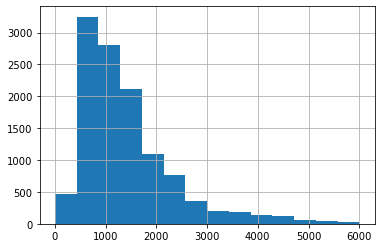

In [ ]:
df['area'].hist(bins=14)

In [ ]:
df['area'].max()

6000.0

### dividing into categories based on histogram

We chose an interval of 500 based on the results we got from the histogram

In [ ]:
intervals = pd.IntervalIndex.from_tuples([(0,500), (500, 1000),(1000, 1500), (1500, 2000), (2000, 2500), (2500, 3000), (3000, float('inf'))])
intervals

IntervalIndex([(0.0, 500.0], (500.0, 1000.0], (1000.0, 1500.0], (1500.0, 2000.0], (2000.0, 2500.0], (2500.0, 3000.0], (3000.0, inf]],
              closed='right',
              dtype='interval[float64]')

In [ ]:
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000+']
seven_areas = pd.cut(df['area'].tolist(), bins=intervals)
seven_areas.categories = labels
df['area'] = seven_area
df['area']

0        2000-2500
2         500-1000
3        1000-1500
4         500-1000
5         500-1000
           ...    
15407        0-500
15408    1500-2000
15409     500-1000
15410    2000-2500
15411     500-1000
Name: area, Length: 11614, dtype: category
Categories (7, object): ['0-500' < '500-1000' < '1000-1500' < '1500-2000' < '2000-2500' < '2500-3000' < '3000+']

In [ ]:
df = encode_and_bind(df, 'area')

X = df.loc[:,df.columns != 'price']
y = df['price']

# all column names except description
X_cols= X.loc[:, X.columns != 'description']
X_cols = X_cols.columns
X_cols = X_cols.tolist()

# selected pipeline
columns_transformer = ColumnTransformer([
      ('tf-idf',TfidfVectorizer(ngram_range=(2,2)), 'description'),
      ('std scalar', StandardScaler(with_mean=False), X_cols),
      ('tosparse',to_sparse_transformer , X_cols)
    ], remainder='passthrough')


run_crossval_with_models(models, columns_transformer, X, y)

LinearRegression with score of:  0.8267175341092081
RandomForestRegressor with score of:  0.772348274799729
DecisionTreeRegressor with score of:  0.6666996031067984
Lasso with score of:  0.8368999497097986
Ridge with score of:  0.8408045500748693


[('LinearRegression',
  array([0.83397667, 0.81922726, 0.86709185, 0.81875768, 0.79453422])),
 ('RandomForestRegressor',
  array([0.7482159 , 0.79905086, 0.81440683, 0.73082955, 0.76923824])),
 ('DecisionTreeRegressor',
  array([0.6515515 , 0.71638037, 0.73829711, 0.59707783, 0.63019119])),
 ('Lasso',
  array([0.84362708, 0.8401881 , 0.8626261 , 0.82053145, 0.81752702])),
 ('Ridge',
  array([0.84935672, 0.83898792, 0.86915948, 0.82425326, 0.82226536]))]

-------------------------------------------------

# Summary

- Removing duplicate data
- Removing trailing spaces
- Dropping rows with missing values
- Price column:
    - removed AED/year from the price 
    - removed outliers in the data using zscore
    - dropped rows that contain "Ask for price"
    
- Area column:
    - removed sqft from the area
    - removed outliers in the data using zscore
- listing_type:
    - removed 5 values which had 2 entries or less
    - applied one hot encoding
 
- location column:
    - extracted neighborhood name only from full location 
    - removed trailing spaces
    - removed values that have less than 10 entries
    - applied one hot encoding
- bedrooms column:
    - removed rows that had 7+ value
    - removed rows that have value of 7 
    - replace studio with 0
- bathrooms column:
    - remove rows that have "7+"
- description:
    - text cleaning
    - converting text to numerical form using TF-IDF


### Exporting the model

In [152]:
from joblib import dump, load


def encode_and_bind(df, feature_to_encode):
    dummies = pd.get_dummies(df[[feature_to_encode]])
    res = pd.concat([df, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return res

def encode_to_numerical_and_bind(df, feature_to_encode):
    
    encoder = OneHotEncoder(sparse=False)
    
    feature_list = df[feature_to_encode].values.reshape(-1,1)

    encoded_feature = encoder.fit_transform(feature_list)
    
    categories = encoder.categories_
    prefixed_categories = add_prefix_to_category(categories[0], feature_to_encode)
    
#   adding encoded feature to df
    df[prefixed_categories] = encoded_feature
    
    df = df.drop([feature_to_encode], axis=1)
    
    return df

def add_prefix_to_category(categories, prefix):
    res = []
    for category in categories:
        res.append(f"{prefix}_{category}")
    
    return res


######################################################################

def export_fit_OneHotEncoder(listing_col):
    
    def export_OneHotEncoder(data_encoder, feature_name):
        dump(data_encoder, f'{feature_name}_encoder.joblib')
    
    
    data_encoder = OneHotEncoder()
    feature_list = listing_col.values.reshape(-1,1)
    encoded_feature = data_encoder.fit_transform(feature_list)
    
    export_OneHotEncoder(data_encoder, listing_col.name)
    

# def load_fit_OneHotEncoder(feature_name):
    
#     data_encoder = load(f'{feature_name}_encoder.joblib')
    
#     return data_encoder
    
    
    
# def encode_to_numerical(listing_col):
    
#     data_encoder = load_fit_OneHotEncoder(listing_col.name)
    
#     feature_list = listing_col.values.reshape(-1, 1)
#     encoded_feature = data_encoder.transform(feature_list)
    
#     return encoded_feature

    
from utils import to_dense, to_sparse, encode_to_numerical_listing_type, encode_to_numerical_location

to_dense_transformer = FunctionTransformer(to_dense)
to_sparse_transformer = FunctionTransformer(to_sparse)

listing_encode_to_numerical_transformer = FunctionTransformer(encode_to_numerical_listing_type)
location_encode_to_numerical_transformer = FunctionTransformer(encode_to_numerical_location)

In [154]:
export_fit_OneHotEncoder(df['listing_type'])
export_fit_OneHotEncoder(df['location'])

# drop columns after exporting fit encoders
# df = df.drop(['listing_type', 'location'], axis=1)

In [155]:
df

,listing_type,bedrooms,bathrooms,area,price,location,description
0,Townhouse,4,4,2165.0,135000.0,Dubai Hills Estate,Brought to you by Driven Properties- this 4 Be...
2,Apartment,1,2,927.0,145000.0,Downtown Dubai,Brought to you by Driven Properties- this 1 Be...
3,Apartment,2,2,1085.0,110000.0,The Views,We are very proud to present to you with this ...
4,Apartment,1,2,857.0,53999.0,Arjan,AZCO REAL ESTATE BROKERS LLC is excited to bri...
5,Apartment,0,1,511.0,36999.0,Arjan,AZCO REAL ESTATE BROKERS LLC is excited to bri...
...,...,...,...,...,...,...,...
16252,Villa,3,4,3063.0,209999.0,Jumeirah Park,- Legacy Style Villa\t- All White Goods includ...
16254,Apartment,3,4,2012.0,150000.0,Al Satwa,The Flagship Two - Jumeirah Garden City Satwa\...
16255,Apartment,2,3,1390.0,125000.0,Sheikh Zayed Road,Excel Properties brings you this fully furnish...
16256,Townhouse,3,1,1881.0,69999.0,Akoya,Amazing Brand New 3 Bedroom with Maids Room\t...


In [156]:
# selected model -> Ridge Regression

X = df.loc[:,df.columns != 'price']
y = df['price']

# all column names except description
X_cols = X[X.columns.difference(['location', 'description', 'listing_type'])]
X_cols = X_cols.columns
X_cols = X_cols.tolist()

# selected pipeline
# columns_transformer = ColumnTransformer([
#       ('tf-idf',TfidfVectorizer(ngram_range=(2,2)), 'description'),
#       ('encode to numerical listing', encode_to_numerical_transformer , 'listing_type' ),
#       ('encode to numerical location', encode_to_numerical_transformer , 'location' ),
#       ('std scalar', StandardScaler(with_mean=False), X_cols),
#       ('tosparse',to_sparse_transformer , X_cols)
#     ], remainder='passthrough')

# encoders are one hot encoding.. 
columns_transformer = ColumnTransformer([
      ('tf-idf',TfidfVectorizer(ngram_range=(2,2)), 5),
      ('encode to numerical listing', listing_encode_to_numerical_transformer , 0 ),
      ('encode to numerical location', location_encode_to_numerical_transformer , 4 ),
      ('std scalar', StandardScaler(with_mean=False), [1,2,3]),
      ('tosparse',to_sparse_transformer , [1,2,3])
    ], remainder='passthrough')

final_pipeline = Pipeline([('col_transformer', columns_transformer), ('ridge', Ridge())])
model_pipeline = final_pipeline.fit(X, y)


In [157]:
model_pipeline

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf-idf',
                                                  TfidfVectorizer(ngram_range=(2,
                                                                               2)),
                                                  5),
                                                 ('encode to numerical listing',
                                                  FunctionTransformer(func=<function encode_to_numerical_listing_type at 0x7f8a89c7ecb0>),
                                                  0),
                                                 ('encode to numerical '
                                                  'location',
                                                  FunctionTransformer(func=<function encode_to_numerical_location at 0x7f8a89c7edd0>),
                                                  4),
                          

In [158]:
from joblib import dump
if __name__ == "__main__":
    model_pipeline.__module__ = "project_final"
    dump(model_pipeline, 'model_file.joblib')

In [159]:
model_pipeline.predict([['Apartment', 3, 2, 2000, "The Views", "We are very proud to present to you with this"]])

array([130970.75395404])